#### ```import the requried Librarys```

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\ADMIN\Downloads\dataframe_ (1).csv")
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


####  Perform exploratory data analysis

In [4]:
data.shape

(1697, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [6]:
# Check for missing values
data.isnull().sum()

input     1
output    1
dtype: int64

#### ```there are 1 nan value in each column```

In [7]:
# Drop duplicates based on a specific column
data.duplicated(subset=data.columns).sum()

606

In [8]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1090 non-null   float64
 1   output  1090 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

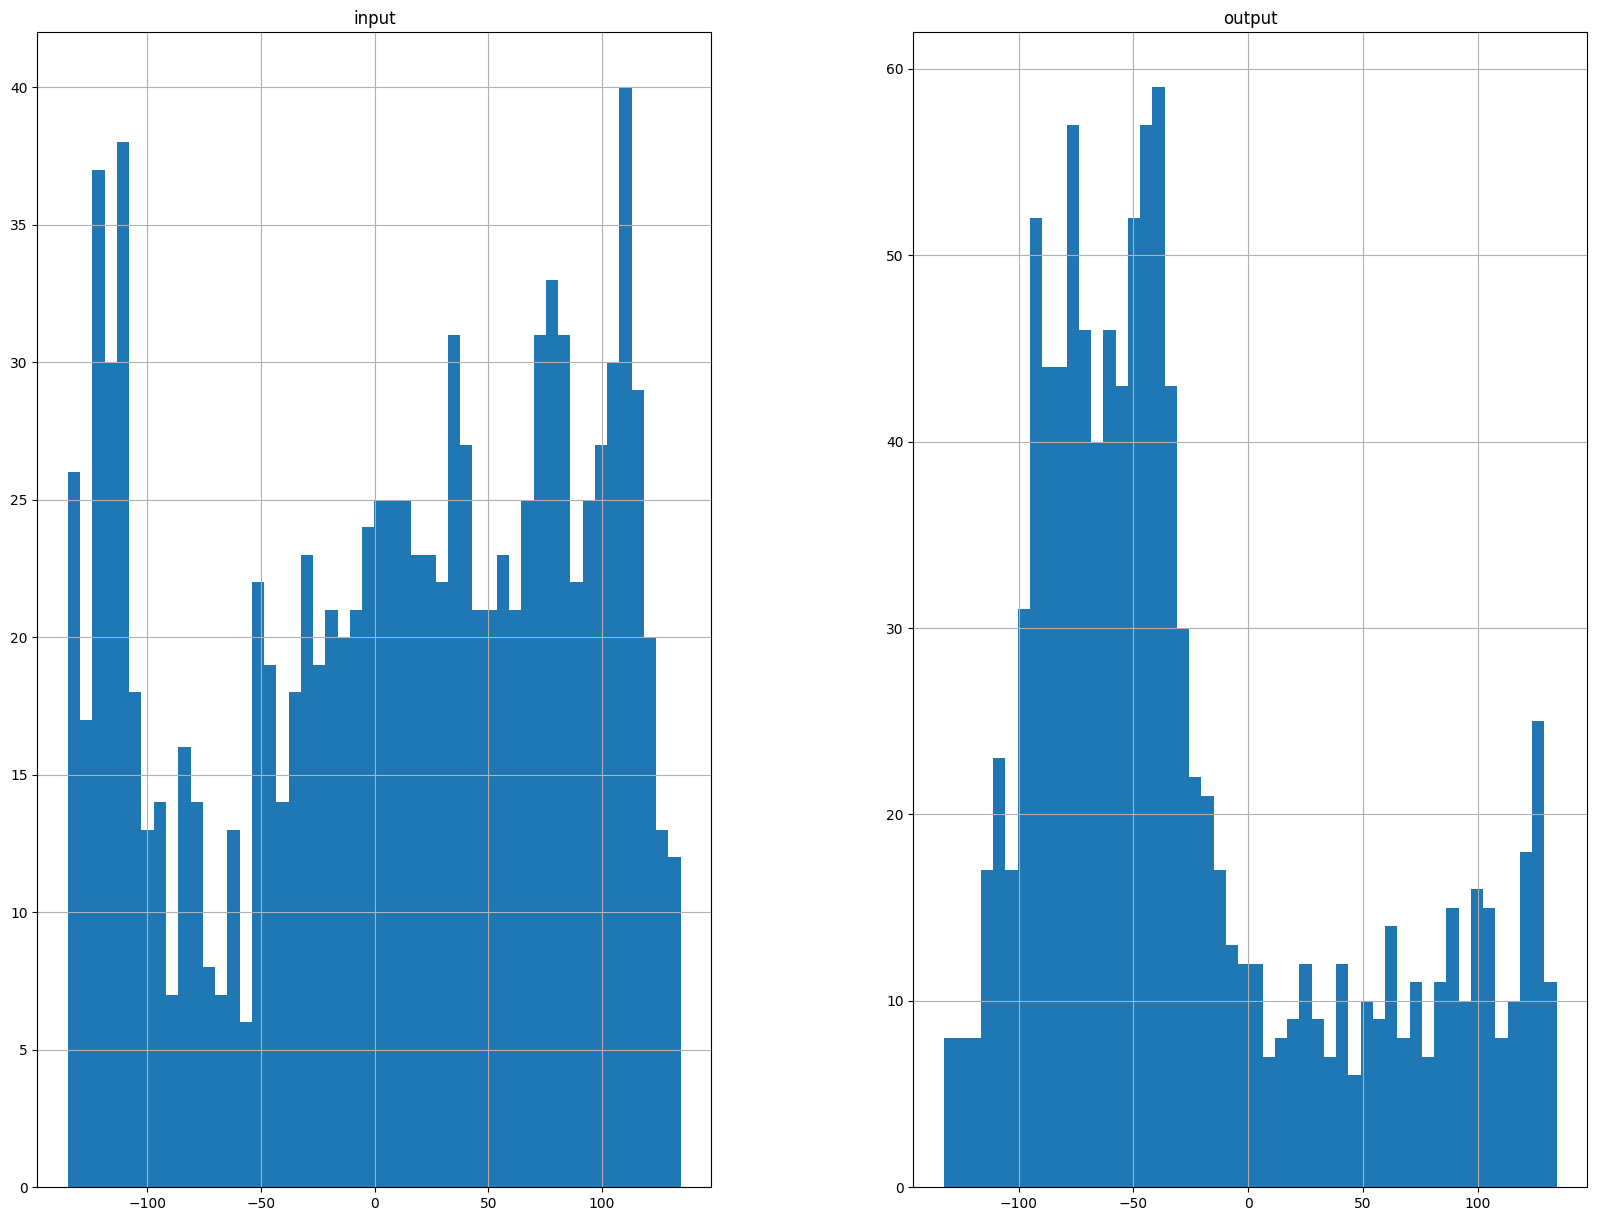

In [14]:
# Plot histograms of each feature to check the distribution
data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: ylabel='Density'>

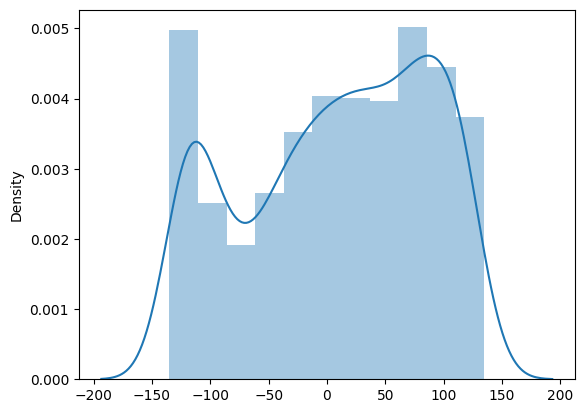

In [11]:
sns.distplot(data[['input']])

<AxesSubplot: ylabel='Density'>

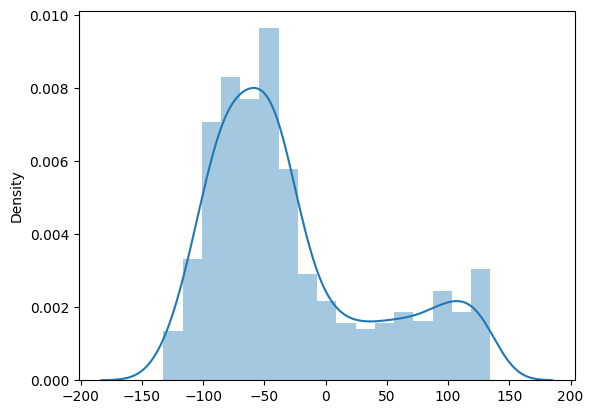

In [12]:
sns.distplot(data[['output']])

#### ```we find there is appropiet Normal distribtion.```

<AxesSubplot: xlabel='input'>

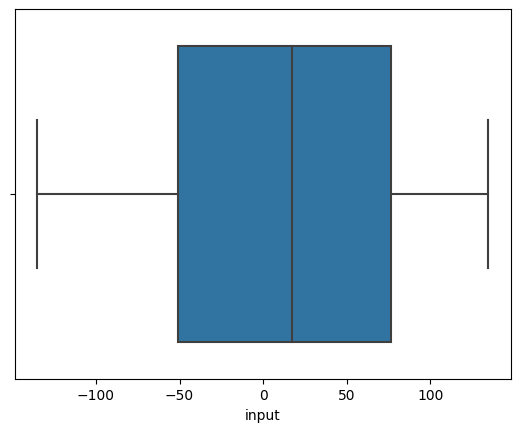

In [15]:
# Handle outliers
sns.boxplot(data['input'])

#### ```There is no outlier```

In [16]:
data.dropna(inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 0 to 1089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1090 non-null   float64
 1   output  1090 non-null   float64
dtypes: float64(2)
memory usage: 25.5 KB


#### ```we drop a nan value```

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [40]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=7)
X = data[["input"]]
X_poly = poly_features.fit_transform(X)

In [41]:
X_poly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
        -2.78575169e+10,  3.41925021e+12, -4.19681053e+14],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
        -2.65120220e+10,  3.22204366e+12, -3.91579539e+14],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
        -4.47026927e+10,  6.03115404e+12, -8.13705325e+14],
       ...,
       [ 1.00000000e+00, -1.09942155e+02,  1.20872774e+04, ...,
        -1.60627989e+10,  1.76597873e+12, -1.94155507e+14],
       [ 1.00000000e+00, -1.11515368e+02,  1.24356774e+04, ...,
        -1.72454137e+10,  1.92312866e+12, -2.14458401e+14],
       [ 1.00000000e+00, -1.10344221e+02,  1.21758472e+04, ...,
        -1.63586693e+10,  1.80508463e+12, -1.99180658e+14]])

In [42]:
# Normalize the features
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_poly)

In [43]:
X_norm

array([[ 0.        , -1.66203185,  1.5981244 , ..., -2.04389419,
         1.8343436 , -2.00714939],
       [ 0.        , -1.64667302,  1.54448397, ..., -1.94354612,
         1.69094386, -1.8687898 ],
       [ 0.        , -1.81668546,  2.16784681, ..., -3.30022066,
         3.73360265, -3.94715307],
       ...,
       [ 0.        , -1.49947609,  1.05733665, ..., -1.16423485,
         0.6321589 , -0.89675996],
       [ 0.        , -1.5194577 ,  1.12060422, ..., -1.25243519,
         0.74643127, -0.99672256],
       [ 0.        , -1.50458279,  1.07342045, ..., -1.18630109,
         0.66059495, -0.92150161]])

In [44]:
# Split the normalized data into training and testing sets
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

In [45]:
# Train the model
model = LinearRegression().fit(X_train, y_train)

In [46]:
# Predict the output on the test data
y_pred = model.predict(X_test)

In [47]:
#y_pred

In [48]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predict the target on the test data
y_pred = model.predict(X_test)

In [50]:
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
# Print the results
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1435.7143470498036
R2 Score: 0.6862073991251436


In [52]:
# Save the model using joblib

import joblib

joblib.dump(model,r"D:\Data Sets\ML Models\Hackathon.joblib")

['D:\\Data Sets\\ML Models\\Hackathon.joblib']

In [ ]:
🤞

#### ```decision tree```

In [59]:
# Split the normalized data into training and testing sets
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

In [60]:
# build decision tree model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
# Predict the target on the test data
y_pred = model.predict(X_test)

In [62]:
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [63]:
# Print the results
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 874.9607297322657
R2 Score: 0.7843764629290749


#### ```SVR```

In [64]:
from sklearn.svm import SVR

In [65]:
# Split the normalized data into training and testing sets
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

In [66]:
# build SVM model
svm_reg = SVR()
svm_reg.fit(X_train, y_train)


SVR()

In [67]:
# Predict the target on the test data
y_pred = model.predict(X_test)

In [68]:
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [69]:
# Print the results
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 897.4653700330183
R2 Score: 0.8131946057140325


####  In these data we find accuracy for 
####  ```Linear Regression --> 0.6862073991251436```
#### ```Decision Tree Regressor --> 0.7843764629290749```
#### ```Support Vector Regressior --> 0.8131946057140325```

In [ ]:
🤞